## Heart Disease Model Notebook
Will show the process of the heart disease prediction model was crafted.

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Process of importing useful libraries.
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plot
import seaborn as sns

## Heart Disease Data Dictionary

Describes the data being worked with.

The following are the features/independent variables that will be used to predict the target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

Data labels shorthand form to full form.
1. age
age in years

2. sex
(1 = male; 0 = female)

3. cp
chest pain type

4. trestbps
resting blood pressure (in mm Hg on admission to the hospital)

5. chol
serum cholestoral in mg/dl

6. fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

7. restecg
resting electrocardiographic results

8. thalach
maximum heart rate achieved

9. exang
exercise induced angina (1 = yes; 0 = no)

10. oldpeak
ST depression induced by exercise relative to rest

11. slope
the slope of the peak exercise ST segment

12. ca
number of major vessels (0-3) colored by flourosopy

13. thal
3 = normal; 6 = fixed defect; 7 = reversable defect

14. target
1 or 0(1 = Heart Disease there, 0 = No Heart Disease)



In [2]:
# Data being prepared.
# Data found at this link: https://www.kaggle.com/ronitf/heart-disease-uci

heart_dataset = pd.read_csv("heart-disease.csv")
heart_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (independent variables matrix): this matrix holds the columns that contain independent variables that will be used to predict
# the presence of heart disease.
X = heart_dataset.drop("target", axis=1)

# Create y (dependent variable): The variable to be predictd, the presence of heart disease.
y = heart_dataset["target"]

Confirming that there are no missing values in the data set.


In [4]:
heart_dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values so no data filling is needed.

In [5]:
# Data balance checking. Confirming data set is balanced between positive and negative outcomes
heart_dataset.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

Indeed the data set is almost balanced 50/50. So there is no need to rebalance the data.

Confirming now that all data is numerical and that no conversions will be needed.

In [6]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Random Forest Classifier Algorithm chosen.
It works well for both categorical and numerical data. Also avoids overfitting to training data, which improves accuracy. 

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=100)

In [8]:
# Fitting model to the training data. 80% training,20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfcModel.fit(X_train, y_train);
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1


In [9]:
# Evaluate the model on the training data and test data
rfcModel.score(X_train, y_train)

1.0

In [10]:
# Model works perfectly on training data.
# Predictive method
# Now testing model on testing data.
rfcModel.score(X_test, y_test)

0.8360655737704918

Model meets the requirement of being accurate more than 75% of the time which the company aimed for. So there is no need to improve the model.

In [11]:
# Returns probabilities of a classification label, this will be used 
# later to return the probability of an estimate being correct. 
rfcModel.predict_proba(X_test[:5])
# The first number is probability of 0 being the target value, the second number is probability of the value of 1.

array([[0.2 , 0.8 ],
       [0.03, 0.97],
       [0.68, 0.32],
       [0.97, 0.03],
       [0.99, 0.01]])

In [12]:
rfcModel.predict(X_test[:5])
# Confirms that prediction results match with aforemenetioned probabilities

array([1, 1, 0, 0, 0], dtype=int64)

In [13]:
# Saving model and confirming it has been saved.
import pickle

pickle.dump(rfcModel, open("rfcHeartModel_v1.pkl", "wb"))

In [14]:
loaded_RFCmodel = pickle.load(open("rfcHeartModel_v1.pkl", "rb"))
loaded_RFCmodel.score(X_test, y_test)

0.8360655737704918

In [15]:
# Correlation matrix to describe the data, this is a descriptive method.
# Shows correlation betweeen various variables
# Find the correlation between our independent variables, this will appear on the website as well.
corr_matrix = heart_dataset.corr()
corr_matrix 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


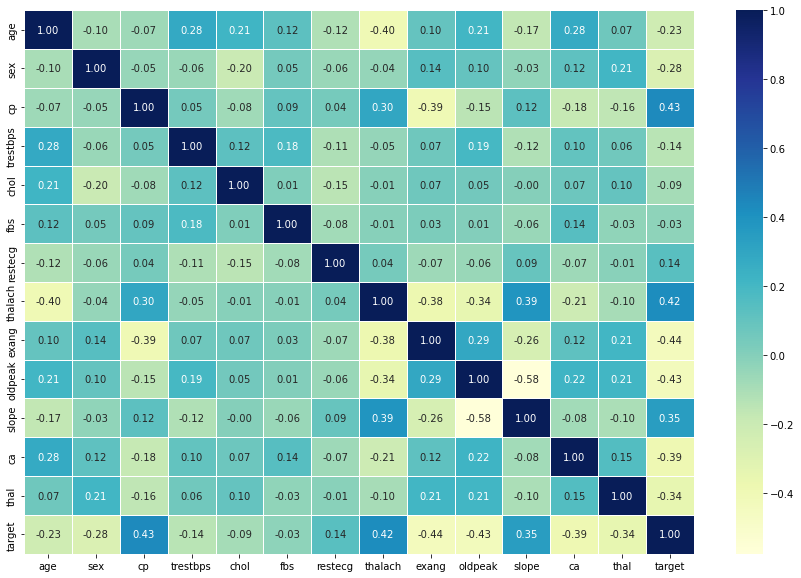

In [16]:
# Seaborn correlation matrix heat map.
corr_matrix = heart_dataset.corr()
plot.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

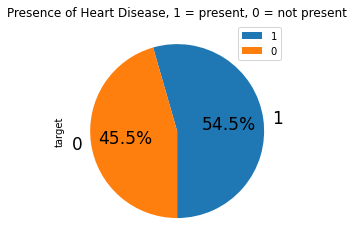

In [17]:
heart_dataset.target.value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=270, fontsize=17,legend = bool
, title = 'Presence of Heart Disease, 1 = present, 0 = not present');
# First Data visualization, shows piechart of how many patients have heart disease in the dataset,
# interactive version of this will be found on the website.

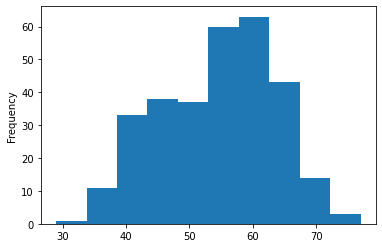

In [18]:
# Distribution of the age column shown in a histogram
# Second Data visualization, aninteractive version of this will be found on the website.
heart_dataset.age.plot.hist();

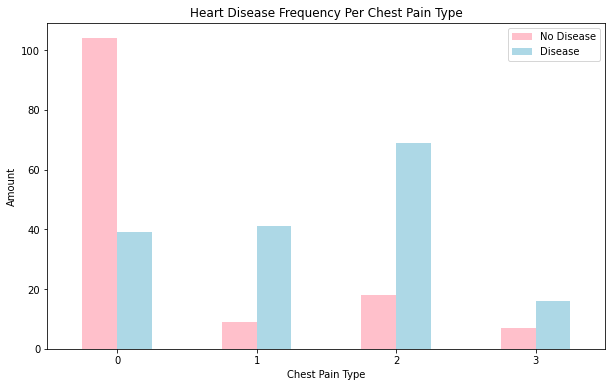

In [19]:
# Plot that shows relationships between chest pain type and presence of heart disease.
# Third Data Visualization, will show up in an interactive format on the website.
pd.crosstab(heart_dataset.cp, heart_dataset.target)
pd.crosstab(heart_dataset.cp, heart_dataset.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["pink", "lightblue"])

# Plot labels
plot.title("Heart Disease Frequency Per Chest Pain Type")
plot.xlabel("Chest Pain Type")
plot.ylabel("Amount")
plot.legend(["No Disease", "Disease"])
plot.xticks(rotation=0);

That is all for this code.